In [24]:
import gym
from gym_anytrading.envs import StocksEnv

from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import locale

In [25]:
df = pd.read_csv('s&p_500.csv')
df.head(10)

,Date,Open,High,Low,Close
0,12/19/2023,"4,743.72","4,768.69","4,743.72","4,768.37"
1,12/18/2023,"4,725.58","4,749.52","4,725.58","4,740.56"
2,12/15/2023,"4,714.23","4,725.53","4,704.69","4,719.19"
3,12/14/2023,"4,721.04","4,738.57","4,694.34","4,719.55"
4,12/13/2023,"4,646.20","4,709.69","4,643.23","4,707.09"
5,12/12/2023,"4,618.30","4,643.93","4,608.09","4,643.70"
6,12/11/2023,"4,593.39","4,623.71","4,593.39","4,622.44"
7,12/08/2023,"4,576.20","4,609.23","4,574.06","4,604.37"
8,12/07/2023,"4,568.84","4,590.92","4,565.22","4,585.59"
9,12/06/2023,"4,586.23","4,590.74","4,546.50","4,549.34"


In [26]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date']
df = df.sort_values(by='Date', ascending=True)
df.set_index('Date', inplace=True)
df.dtypes

Open     object
High     object
Low      object
Close    object
dtype: object

In [27]:
columns_to_fix = ['Open', 'High', 'Low', 'Close']

for column in columns_to_fix:
    df[column] = df[column].apply(lambda x: float(x.replace(",", "")))
    
df.head()

,Open,High,Low,Close
Date,,,,
2022-12-19,3853.79,3854.86,3800.04,3817.66
2022-12-20,3810.47,3838.24,3795.62,3821.62
2022-12-21,3839.49,3889.82,3839.49,3878.44
2022-12-22,3853.26,3853.26,3764.49,3822.39
2022-12-23,3813.11,3845.80,3797.01,3844.82


In [28]:
env = gym.make(
    'stocks-v0',
    df=df,
    window_size=5,
    frame_bound=(5, 300),
)

/Users/OliverCarmontsDesktop/anaconda3/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 2)
  logger.warn(


/Users/OliverCarmontsDesktop/anaconda3/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/Users/OliverCarmontsDesktop/anaconda3/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/Users/OliverCarmontsDesktop/anaconda3/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(
/Users/OliverCarmontsDesktop/anaconda3/lib/python3.10/site-pack

info {'total_reward': 603.6099999999988, 'total_profit': 0.4844894283863661, 'position': 1}


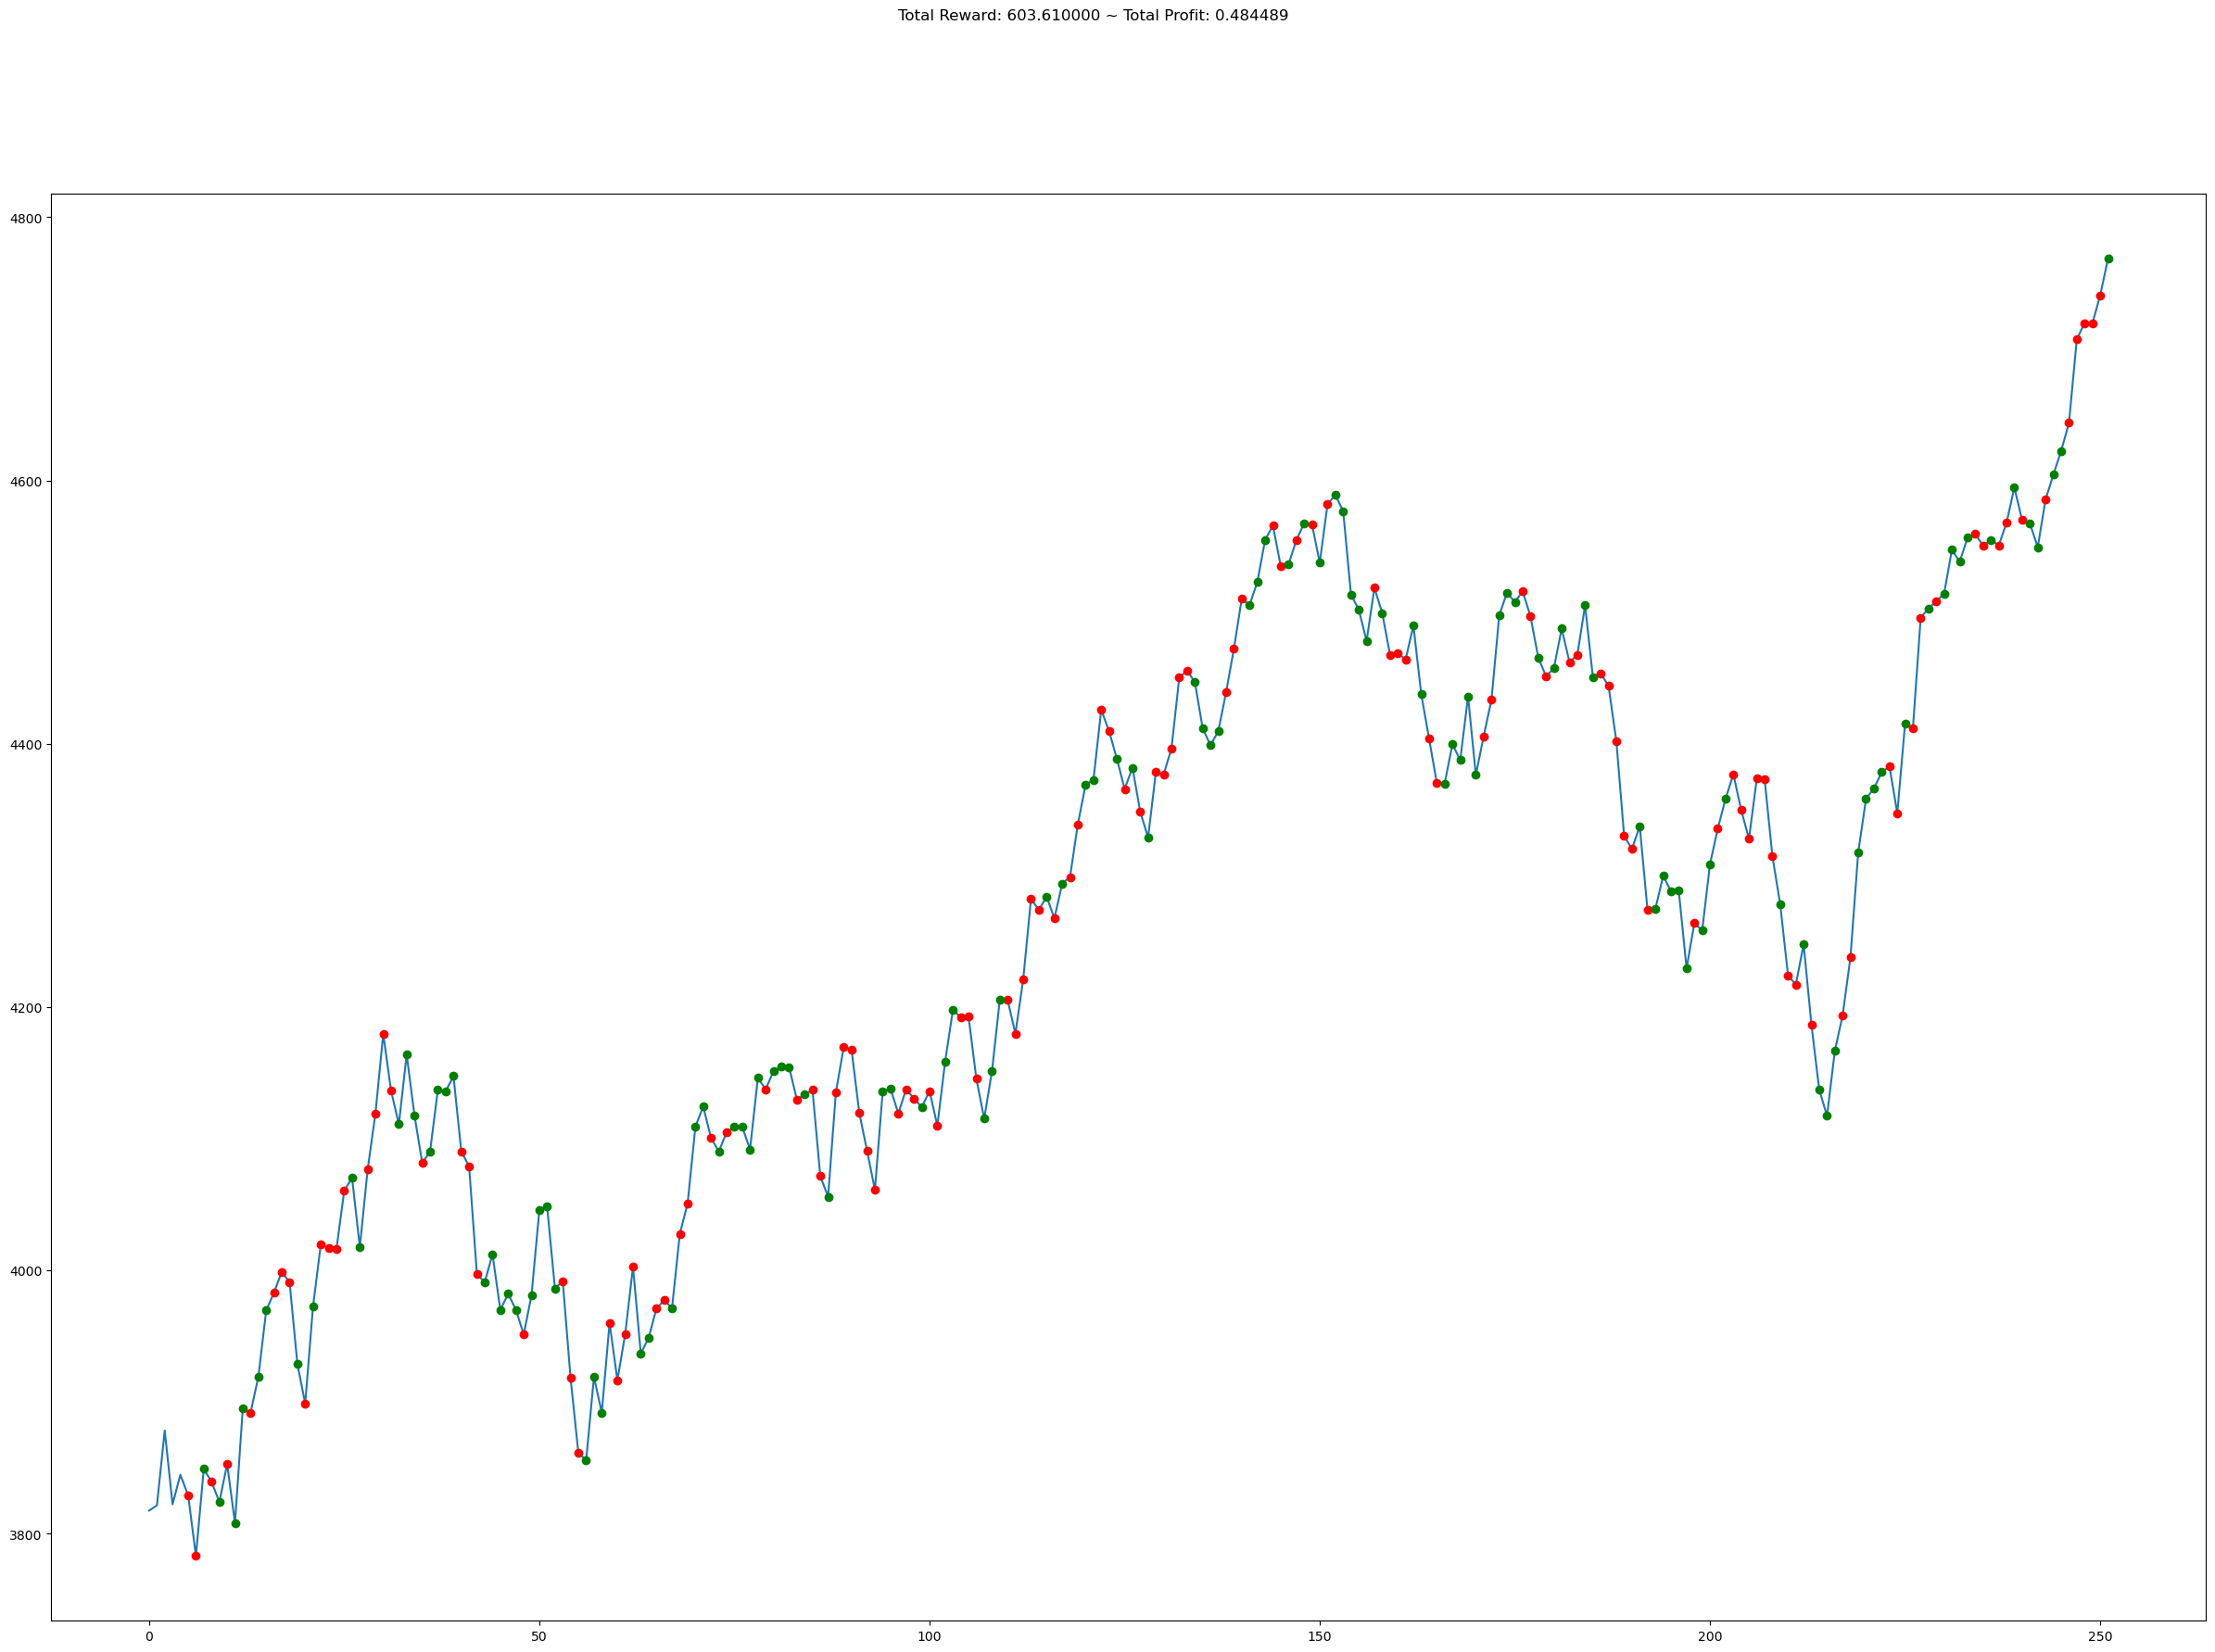

In [29]:
obs = env.reset()
while True: 
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(30,20))
plt.cla()
env.render_all()

In [30]:
env = DummyVecEnv([lambda: StocksEnv(df, frame_bound=(5,300), window_size=5)])

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=20000)

/Users/OliverCarmontsDesktop/anaconda3/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Using cpu device
-----------------------------
| time/              |      |
|    fps             | 2265 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1572        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.017328743 |
|    clip_fraction        | 0.00161     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | 3.31e-05    |
|    learning_rate        | 0.0003      |
|    loss                 | 2.94e+03    |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.000961   |
|    value_loss           | 6.07e+03    |
-----------------------------------------
-----------------

info {'total_reward': 1086.5199999999973, 'total_profit': 0.6753548618280629, 'position': 0}


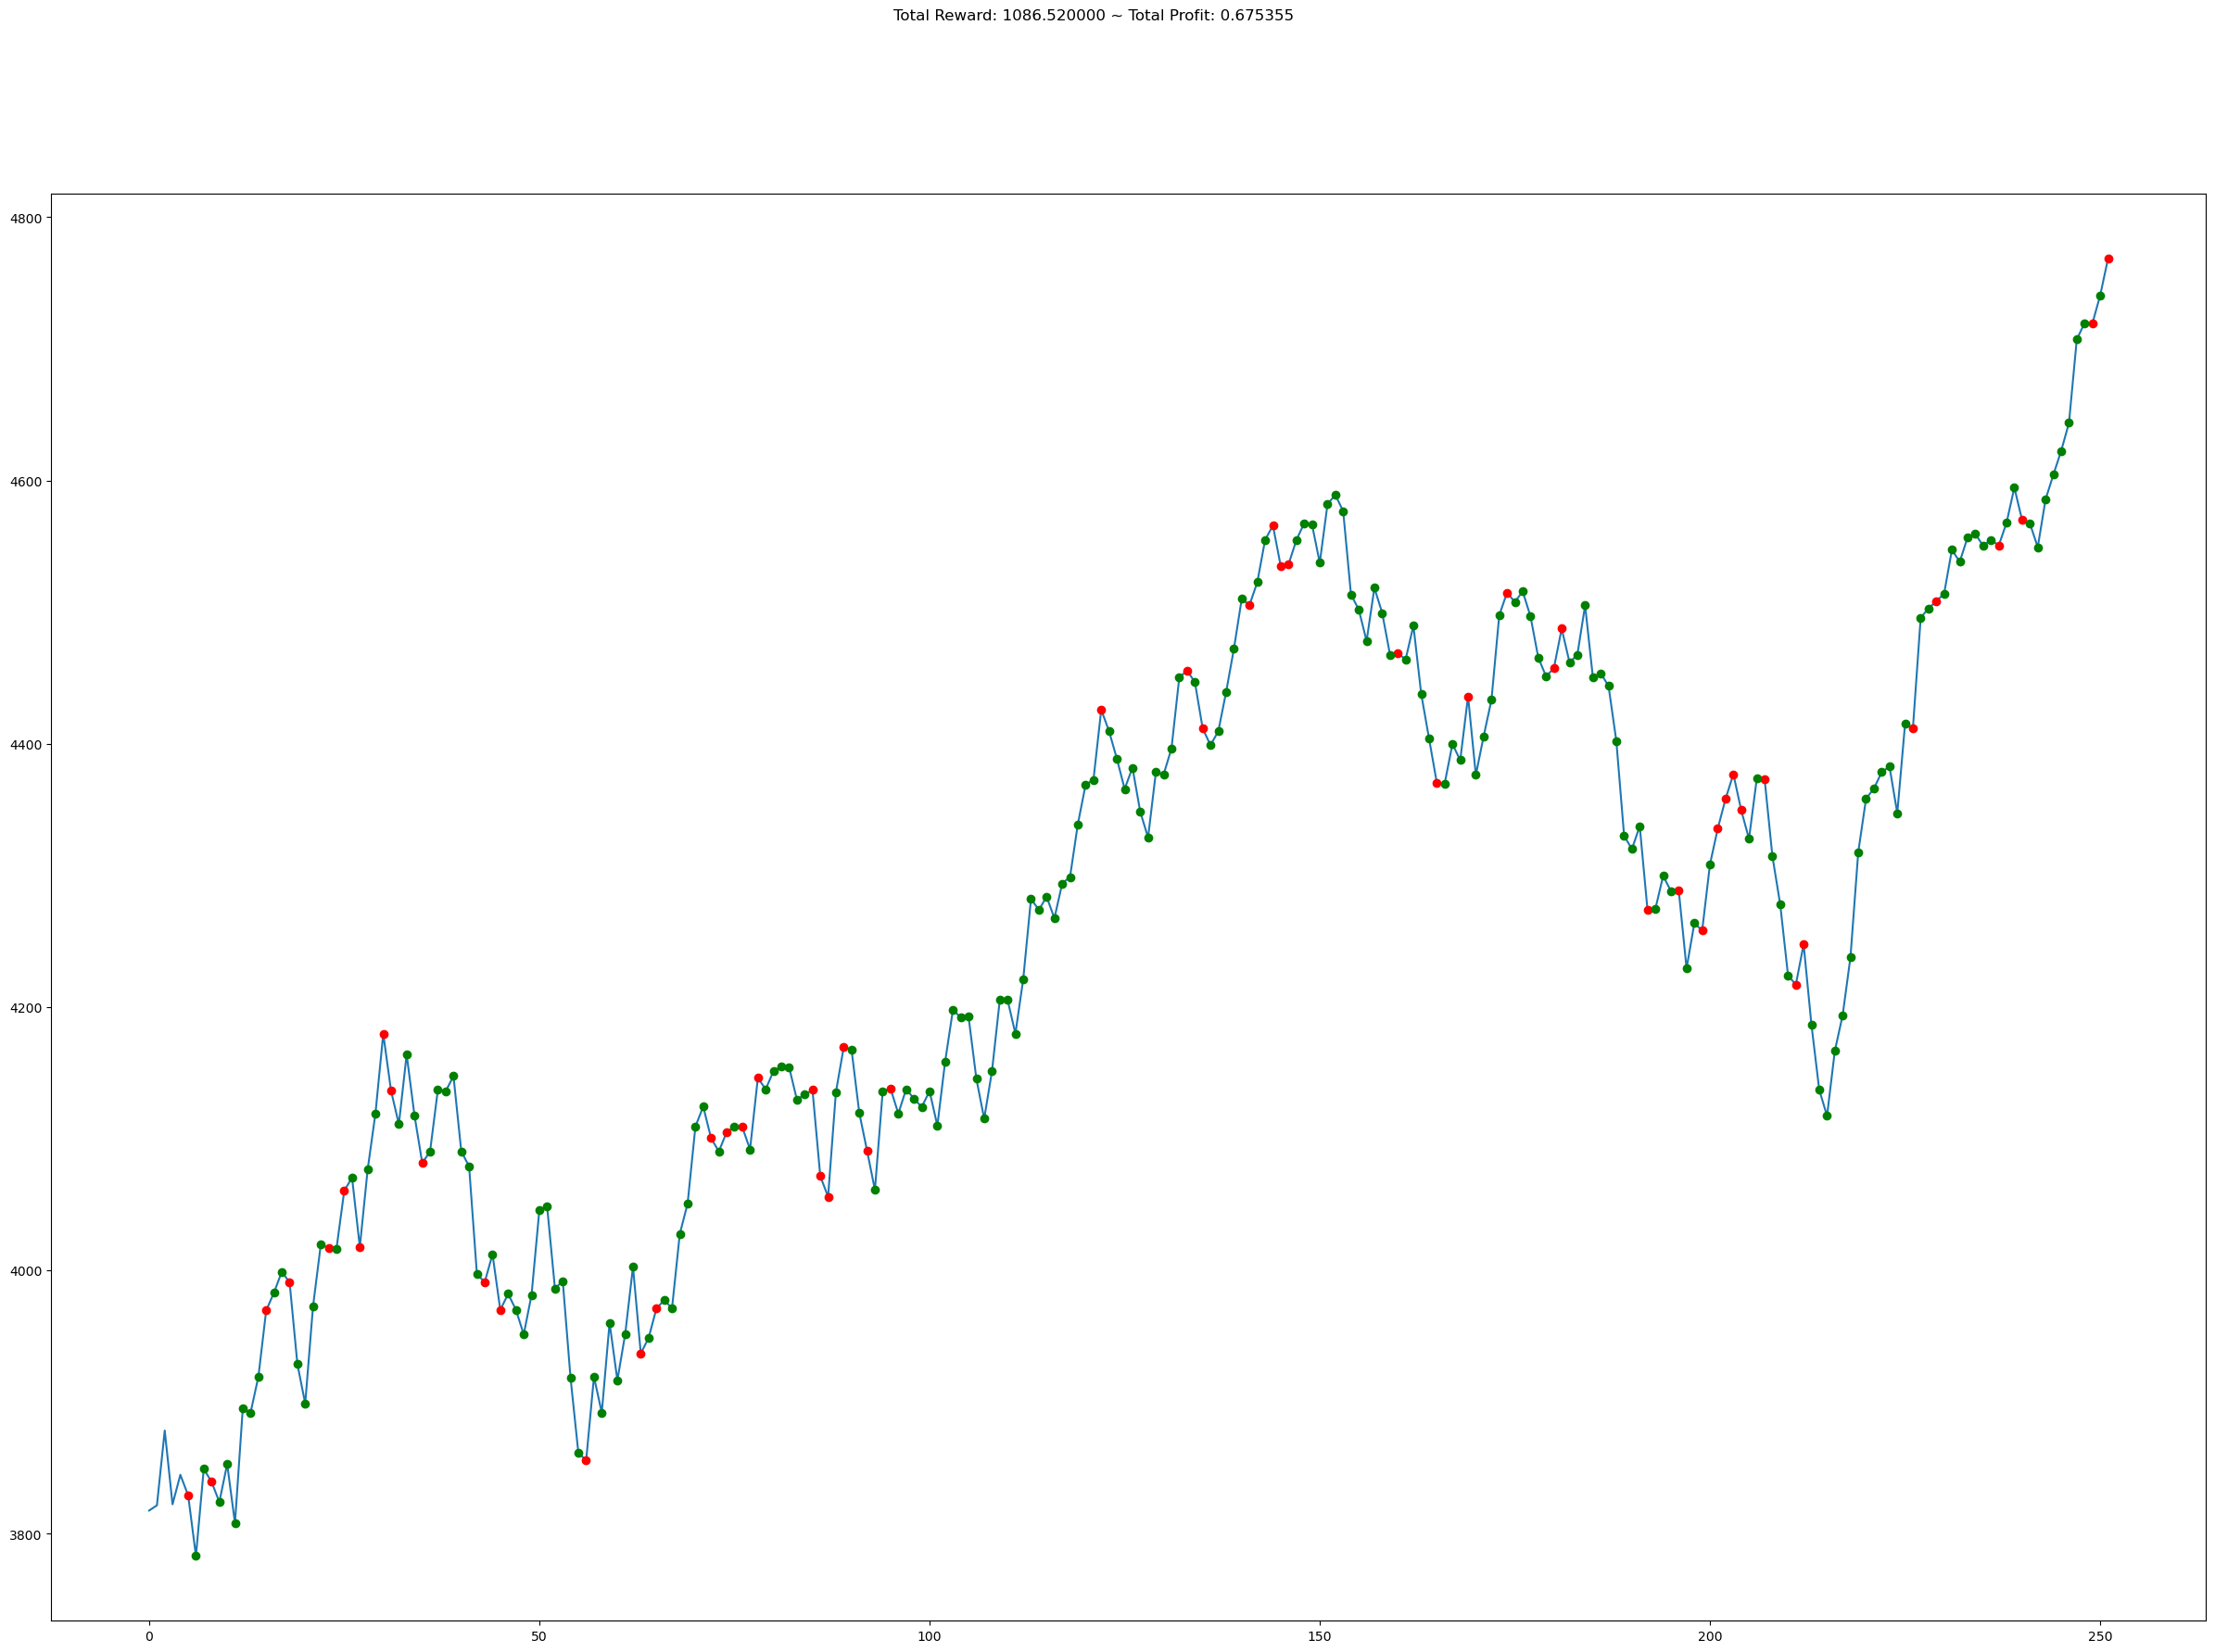

In [31]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,300), window_size=5)
obs = env.reset()

while True: 
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break
        
plt.figure(figsize=(30,20))
plt.cla()
env.render_all()